In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# loading the dataset
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Nucot_DSP\dsp_38_mock_assessment_naveen\salary_details.csv')

In [3]:
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
20035,46,Self-emp-not-inc,236852,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K
8551,21,Self-emp-not-inc,83704,9th,5,Never-married,Sales,Own-child,White,Male,0,0,30,United-States,<=50K
32842,32,Local-gov,159187,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
12771,44,Local-gov,183850,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,56,United-States,<=50K
20410,20,Private,190423,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,<=50K
38371,43,Self-emp-inc,104892,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,45,United-States,<=50K
35205,19,?,133983,Some-college,10,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K
26071,51,Private,125796,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,35,Jamaica,<=50K
29661,40,Private,51151,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
47580,42,Private,235700,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [4]:
# checking the general information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.shape

(48842, 15)

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df.drop(columns=['fnlwgt','education','capital-gain', 'capital-loss','native-country'], inplace=True)

In [8]:
df.rename(columns= {
    'educational-num': 'educational_num',
    'marital-status' : 'marital_status',
    'capital-gain' : 'capital_gain',
    'capital-loss' : 'capital_loss',
    'hours-per-week' : 'hours_per_week'
}, inplace = True)

## Understanding the features of Data

###  Analysing workclass feature

In [9]:
# unique values in df['workclass']

df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [10]:
#replacing '?' with other

df['workclass'] = df['workclass'].replace('?', 'other')

In [11]:
df.workclass.unique()

array(['Private', 'Local-gov', 'other', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

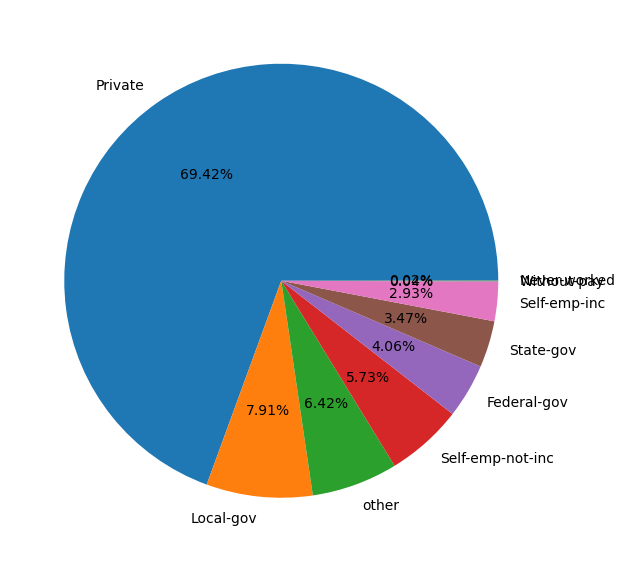

In [12]:
plt.figure(figsize=(7,13))

labels = df.workclass.unique()
plt.pie(x = df.workclass.value_counts(), autopct='%1.2f%%', labels=labels)

plt.show()

### Education

In [13]:
# unique values of educational_num

df['educational_num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

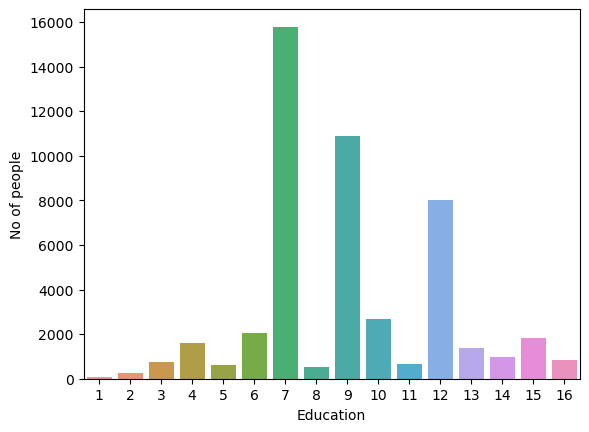

In [14]:
sns.barplot(y=df['educational_num'].value_counts(), x=df['educational_num'].unique())
plt.ylabel('No of people')
plt.xlabel('Education')
plt.show()

### Marital Status vs Income

<Axes: xlabel='marital_status', ylabel='Count'>

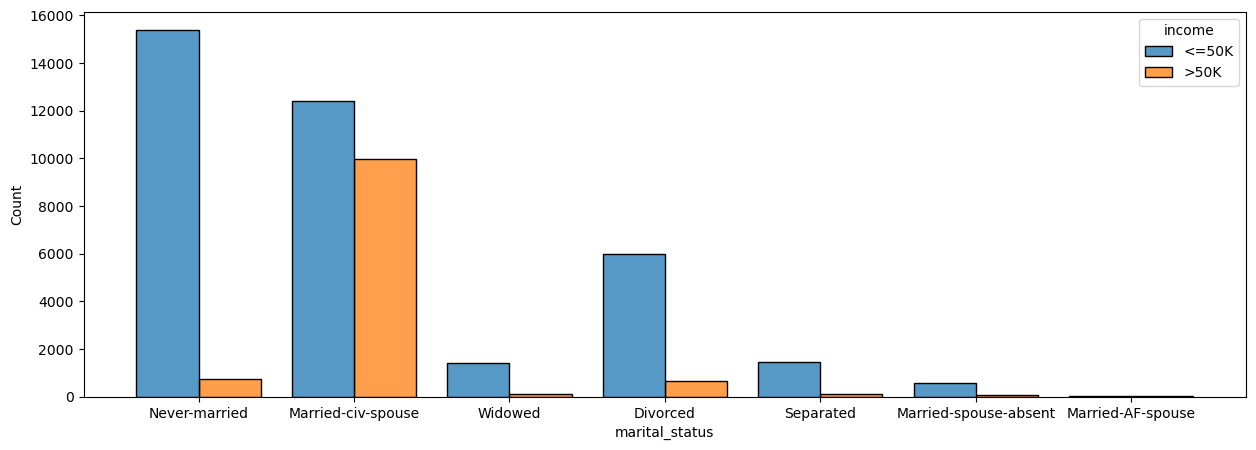

In [15]:
plt.figure(figsize=(15,5))

sns.histplot(data=df, x= 'marital_status',shrink=0.8, multiple='dodge', hue='income')

### Gender Vs income

<Axes: xlabel='gender', ylabel='Count'>

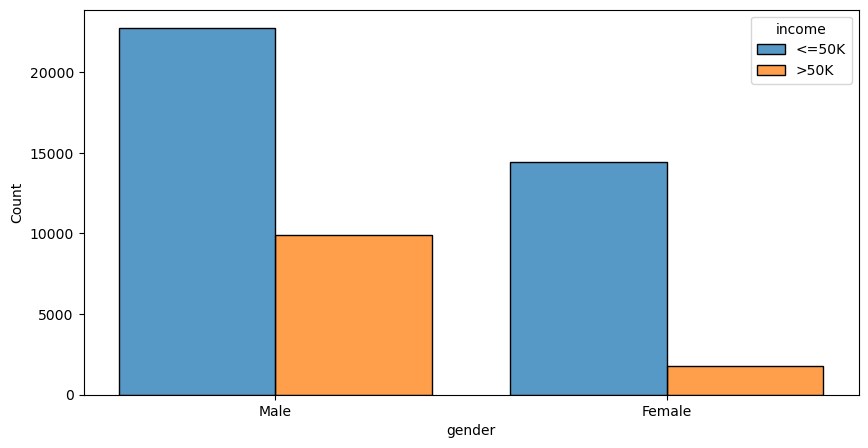

In [16]:
plt.figure(figsize=(10,5))

sns.histplot(data=df, x= 'gender',shrink=0.8, multiple='dodge', hue='income')

### HrsPW vs Income

In [17]:
df.columns

Index(['age', 'workclass', 'educational_num', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'income'],
      dtype='object')

<Axes: xlabel='hours_per_week', ylabel='Density'>

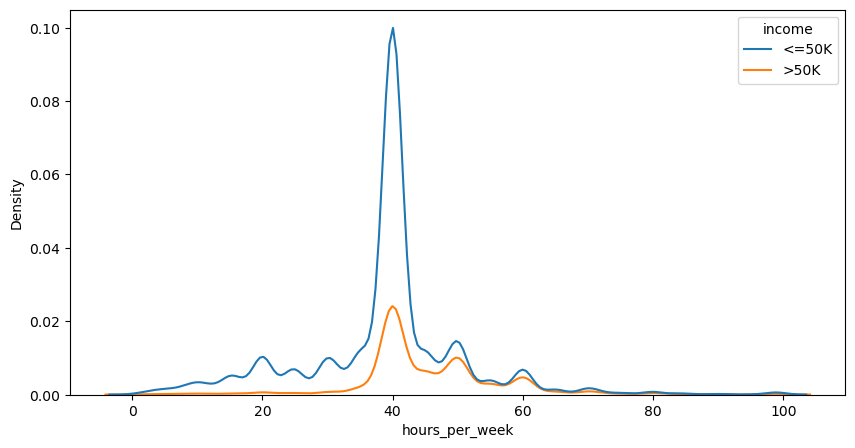

In [18]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='hours_per_week', hue='income')

### Handling Outliers

<Figure size 1000x800 with 0 Axes>

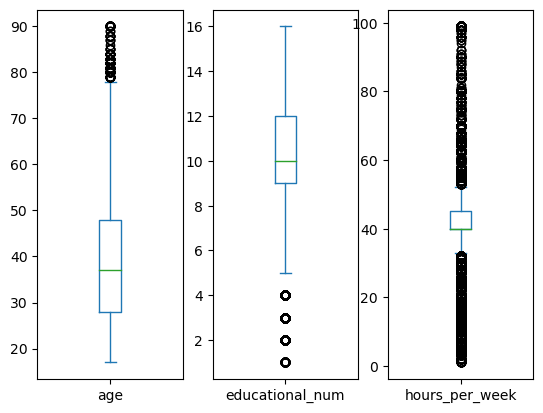

In [19]:
plt.figure(figsize=(10,8))
df.plot(kind='box', subplots = True)
plt.show()

In [20]:
# using IQR

def iqr(data):
    
    # calculating q1 and q3 of data[x]
    
    q1 = data[x].quantile(0.25)
    q3 = data[x].quantile(0.75)
    
    #calculating iqr
    IQR = q3 - q1
    
    max_limit = q3 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR)
    
    # creating a Dataframe with less than max_limit and morethan min_limit
    df_wo = pd.DataFrame( np.where( data[x] > max_limit, max_limit, (np.where (data[x] < min_limit, min_limit, df[x] ))), columns=[x])
    
    # assigning back the df with data
    data = df_wo
    
    return data    

In [21]:
# removing the outliers of dataframe df using for loop

for x in df:
    if df[x].dtype == 'int64':
        df[x] = iqr(df)

<Figure size 1000x800 with 0 Axes>

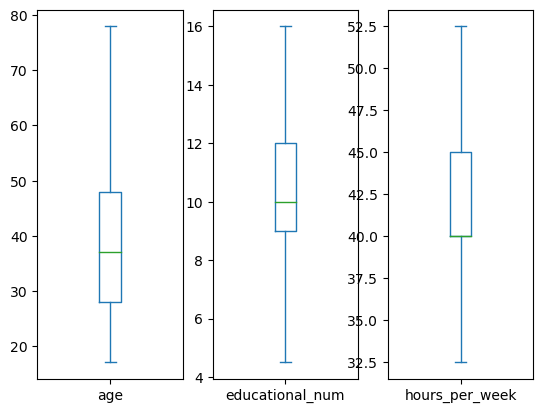

In [22]:
plt.figure(figsize=(10,8))
df.plot(kind='box', subplots = True)
plt.show()

### LabelEncoding 

In [23]:
# creating object for the Label encoder
label = LabelEncoder()

# creating a new data frame with encodded features
df_enc = df.apply(label.fit_transform)

In [24]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int32
 2   educational_num  48842 non-null  int64
 3   marital_status   48842 non-null  int32
 4   occupation       48842 non-null  int32
 5   relationship     48842 non-null  int32
 6   race             48842 non-null  int32
 7   gender           48842 non-null  int32
 8   hours_per_week   48842 non-null  int64
 9   income           48842 non-null  int32
dtypes: int32(7), int64(3)
memory usage: 2.4 MB


<Axes: >

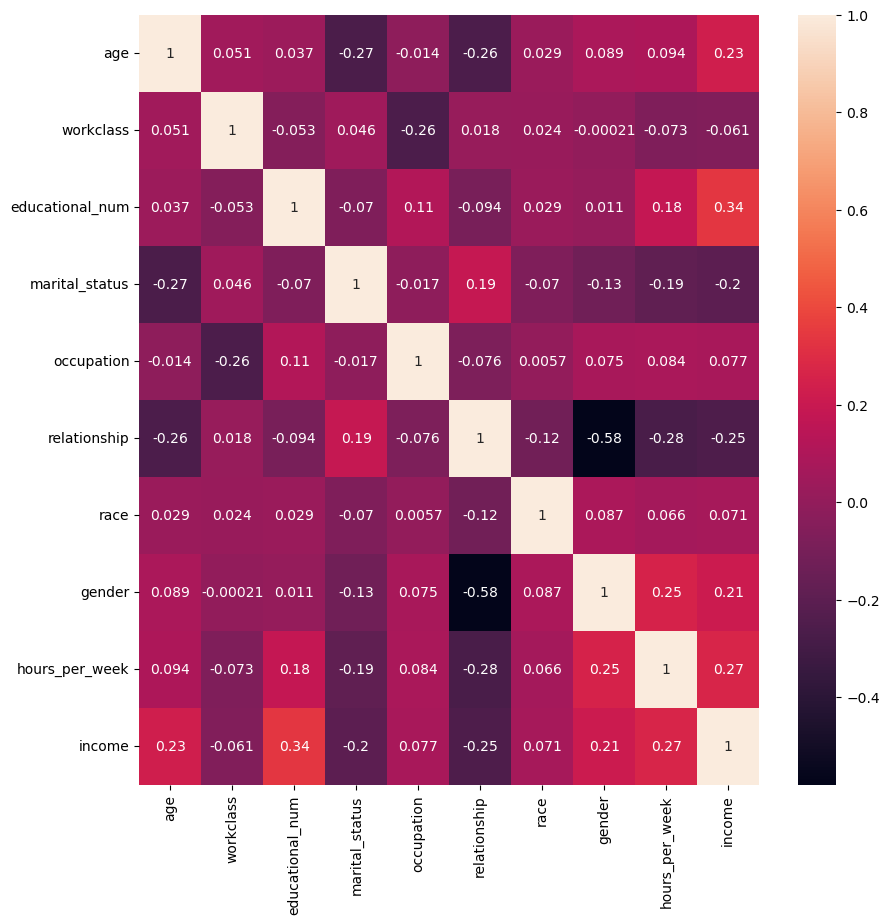

In [25]:
# correlation between the variables

plt.figure(figsize=(10,10))

sns.heatmap(df_enc.corr(), annot= True)

### Feature Selection and Scaling

In [26]:
df_enc.columns

Index(['age', 'workclass', 'educational_num', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'income'],
      dtype='object')

In [27]:
# independent features
X = df_enc[['age', 'workclass', 'educational_num', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week']]

# dependent feature
y = df_enc[['income']]

In [28]:
X.sample(4)

,age,workclass,educational_num,marital_status,occupation,relationship,race,gender,hours_per_week
8251,19,3,2,4,6,3,4,1,8
16129,27,3,9,0,10,1,4,0,4
39123,8,3,5,5,6,4,2,0,8
25441,19,3,5,2,3,0,4,1,21


In [29]:
y.sample(4)

,income
40112,0
38154,0
21358,0
4673,0


In [30]:
# scaling the features to same scale
mms = MinMaxScaler()

X = mms.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2)

## Training the data with algorithms

### Logistic Regression

In [32]:
# creating the object for the algorithm
model_lr = LogisticRegression()

# trainging the model with train data
model_lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
# evaluating the model logistic regression

print(model_lr.score(X_test, y_test))

0.8100730225892309


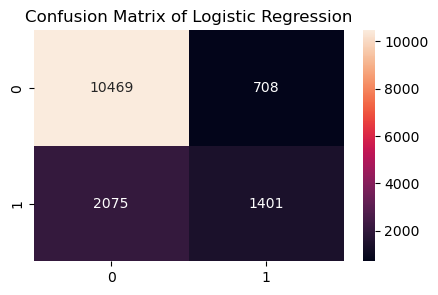

In [34]:
lr_cm = confusion_matrix(y_test, model_lr.predict(X_test))

plt.figure(figsize=(5,3))
sns.heatmap(lr_cm, annot= True, fmt='d')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


In [35]:
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     11177
           1       0.66      0.40      0.50      3476

    accuracy                           0.81     14653
   macro avg       0.75      0.67      0.69     14653
weighted avg       0.79      0.81      0.79     14653



### DecisionTree

In [36]:
# creating the object for the algorithm
model_dtc = DecisionTreeClassifier()


# trainging the model with train data
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
# evaluating the model DecisionTree
print(model_dtc.score(X_test, y_test))

0.7844809936531768


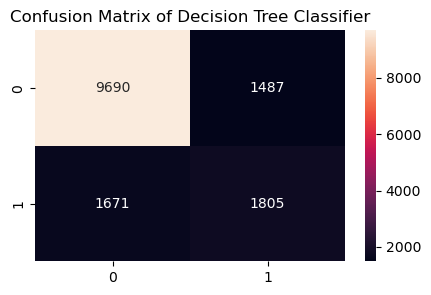

In [38]:
dtc_cm = confusion_matrix(y_test, model_dtc.predict(X_test))

plt.figure(figsize=(5,3))
sns.heatmap(dtc_cm, annot= True, fmt='d')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()


In [39]:
print(classification_report(y_test, model_dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     11177
           1       0.55      0.52      0.53      3476

    accuracy                           0.78     14653
   macro avg       0.70      0.69      0.70     14653
weighted avg       0.78      0.78      0.78     14653



### Naive Bayes

In [40]:
# creating the object for the algorithm
model_gnb = GaussianNB()


# trainging the model with train data
model_gnb.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

0.786937828431038


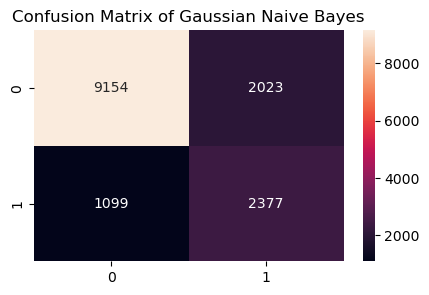

In [41]:
# evaluating the model GgaussianNB
print(model_gnb.score(X_test, y_test))

# confusion matrix of the model
gnb_cm = confusion_matrix(y_test, model_gnb.predict(X_test))

plt.figure(figsize=(5,3))
sns.heatmap(gnb_cm, annot= True, fmt='d')
plt.title('Confusion Matrix of Gaussian Naive Bayes')
plt.show()

In [42]:
print(classification_report(y_test, model_gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     11177
           1       0.54      0.68      0.60      3476

    accuracy                           0.79     14653
   macro avg       0.72      0.75      0.73     14653
weighted avg       0.81      0.79      0.79     14653



### RandomForest 

In [43]:
# creating the object for the algorithm
model_rfc = RandomForestClassifier()


# trainging the model with train data
model_rfc.fit(X_train,y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_10872\2687044135.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(X_train,y_train)


RandomForestClassifier()

0.8179894902067836


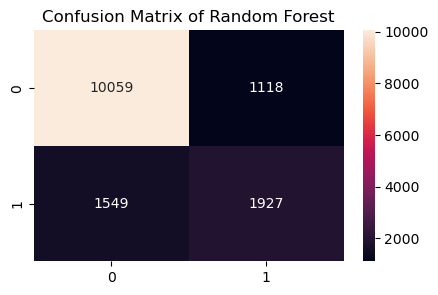

In [44]:
# evaluating the model RandomForest
print(model_rfc.score(X_test, y_test))

# confusion matrix of the model
rfc_cm = confusion_matrix(y_test, model_rfc.predict(X_test))

plt.figure(figsize=(5,3))
sns.heatmap(rfc_cm, annot= True, fmt='d')
plt.title('Confusion Matrix of Random Forest')
plt.show()

In [45]:
print(classification_report(y_test, model_dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     11177
           1       0.55      0.52      0.53      3476

    accuracy                           0.78     14653
   macro avg       0.70      0.69      0.70     14653
weighted avg       0.78      0.78      0.78     14653



### SVC

In [46]:
# creating the object for the algorithm
model_svc = SVC()


# trainging the model with train data
model_svc.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

0.8294547191701358


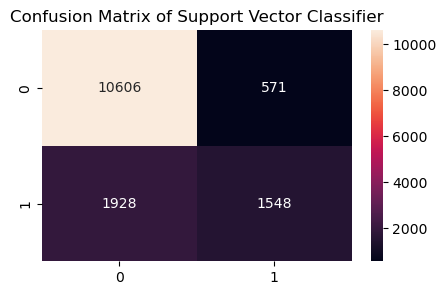

In [47]:
# evaluating the model DecisionTree
print(model_svc.score(X_test, y_test))

# confusion matrix of the model
svc_cm = confusion_matrix(y_test, model_svc.predict(X_test))

plt.figure(figsize=(5,3))
sns.heatmap(svc_cm, annot= True, fmt='d')
plt.title('Confusion Matrix of Support Vector Classifier')
plt.show()

In [48]:
print(classification_report(y_test, model_dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     11177
           1       0.55      0.52      0.53      3476

    accuracy                           0.78     14653
   macro avg       0.70      0.69      0.70     14653
weighted avg       0.78      0.78      0.78     14653



### KNN

In [49]:
model_KNNC=KNeighborsClassifier(n_neighbors=5)

model_KNNC.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

0.8213335153210947


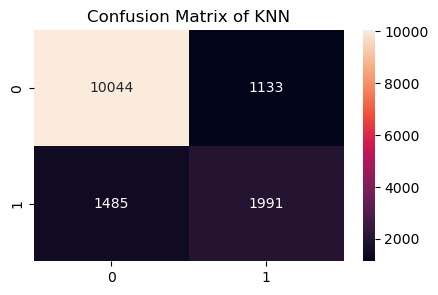

In [50]:
print(model_KNNC.score(X_test, y_test))

# confusion matrix of the model
knn_cm = confusion_matrix(y_test, model_KNNC.predict(X_test))

plt.figure(figsize=(5,3))
sns.heatmap(knn_cm, annot= True, fmt='d')
plt.title('Confusion Matrix of KNN')
plt.show()

In [51]:
print(classification_report(y_test, model_KNNC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11177
           1       0.64      0.57      0.60      3476

    accuracy                           0.82     14653
   macro avg       0.75      0.74      0.74     14653
weighted avg       0.82      0.82      0.82     14653



### GradientBoosting

In [52]:
model_gbc = GradientBoostingClassifier()

model_gbc.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

0.8435815191428376


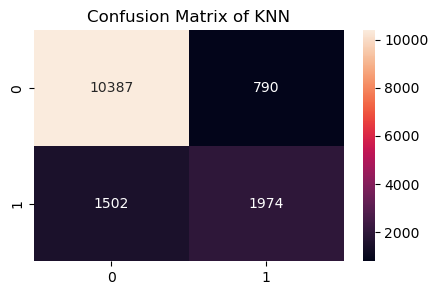

In [53]:
print(model_gbc.score(X_test,y_test))

# confusion matrix of the model
gbc_cm = confusion_matrix(y_test, model_gbc.predict(X_test))

plt.figure(figsize=(5,3))
sns.heatmap(gbc_cm, annot= True, fmt='d')
plt.title('Confusion Matrix of KNN')
plt.show()

In [54]:
print(classification_report(y_test, model_gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11177
           1       0.71      0.57      0.63      3476

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.77     14653
weighted avg       0.84      0.84      0.84     14653



## Conclusion

GradientBoosting is the best model in this dataset with prediction of 84%